# Projet : Série Chronologique

Importation des modules

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# On importe quelques outils pour les SARIMA, ACF/PACF, tests usuels, ...
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss, adfuller

Importation des données

In [55]:
# dossier = '/users/2023/ds2/118003905/M2_serie_chrono/'
dossier = 'data/'
fichier = 'export_nb_par_semaine.csv'

# On va travailler sur le jeu de données suivantes
Data = pd.read_csv(dossier+fichier)

# On enlève les premières dernières semaines qui représentent des semaines non entières.
Data = Data.iloc[2:-2]

# On renome les colonnes :
Data.columns = ['week', 'nb_vues']

# Séparons les dates, des valeurs :
Data_dates = Data['week']
Data_values = Data['nb_vues']

# 5 premières données :
print(Data.head(5))

         week  nb_vues
2  2020-08-15     1395
3  2020-08-22     1428
4  2020-08-29      473
5  2020-09-01     1459
6  2020-09-08     1409


Testons immédiatement la stationnarité :

In [56]:
TestA = adfuller(Data_values) # Test ADF :    H0 Non Stationnaire
print("ADF p-val : ", TestA[1])
TestK = kpss(Data_values) # Test KPSS :       H0 Stationnaire
print("KPSS p-val : ", TestK[1])

ADF p-val :  2.283068542607219e-05
KPSS p-val :  0.1


C:\Users\kevin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Les tests semblent indiqués une stationnarité, mais cela reste douteux (p-value KPSS proche de 10%), observons les données :

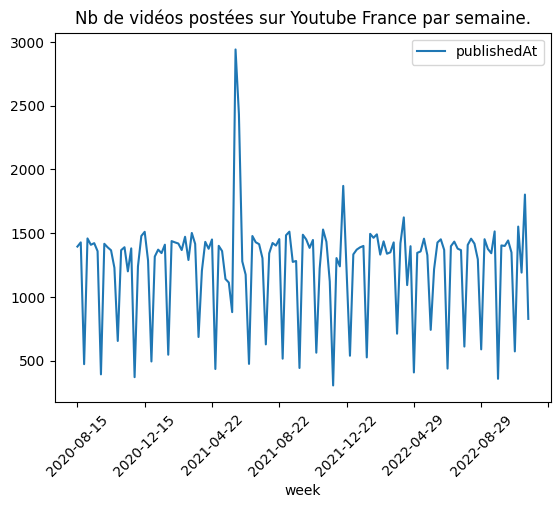

In [21]:
Data.plot(title = 'Nb de vidéos postées sur Youtube France par semaine.', x='week')
plt.xticks(rotation= 45)
plt.show()

On observe clairement une périodicité, la série n'est pas stationnaire.

Appliquons une décomposition pour extraire les tendances linéaires et périodiques :

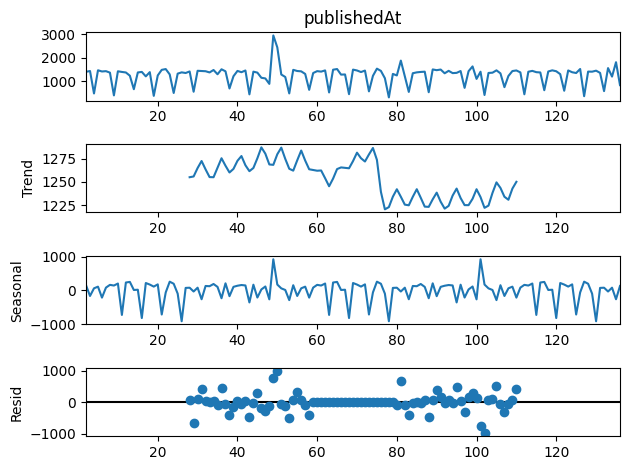

In [52]:
Decomp = sm.tsa.seasonal_decompose(Data_values, model='additive', period=52)
Decomp.plot()
plt.show()

Choississons une transformation de Box-Cox :

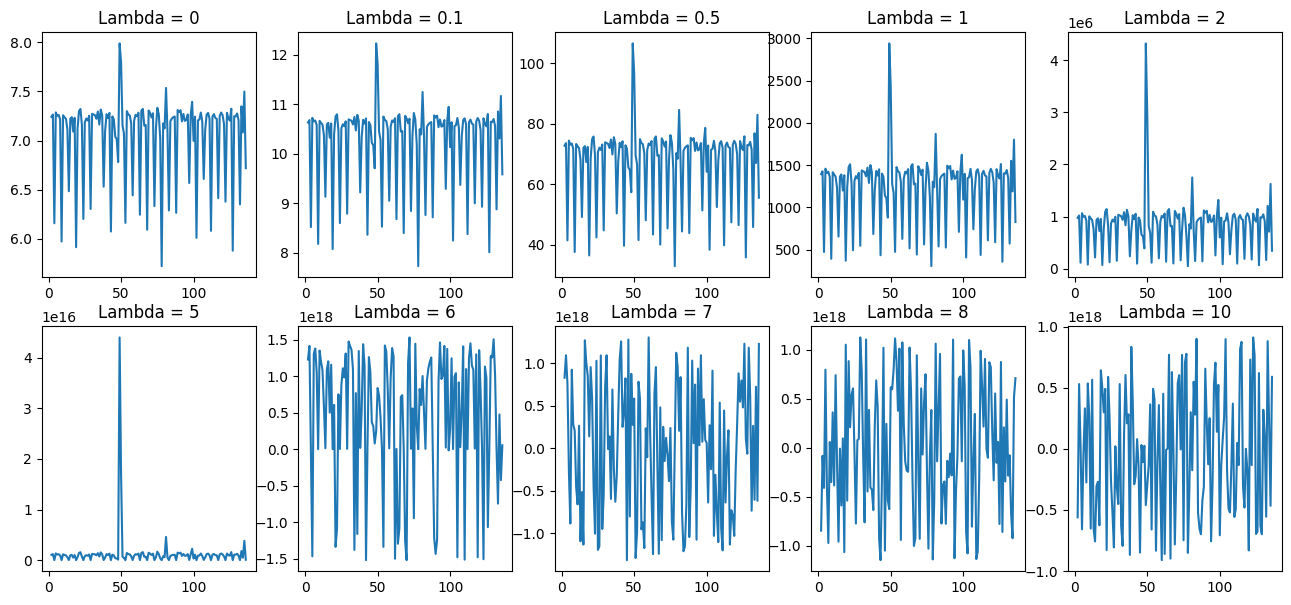

In [51]:
fig = plt.figure(figsize=(16,7))
axs = fig.subplots(2,5)

Liste_lambda = [0, 0.1, 0.5, 1, 2, 5, 6, 7, 8, 10]

for k, Lbda in enumerate(Liste_lambda):
    if Lbda == 0:
        transf = np.log(Data_values)
    else: transf = (Data_values**Lbda-1)/Lbda
    transf.plot(ax = axs[k//5,k%5], title = f'Lambda = {Lbda}')

Les valeurs de Lambda entre 6 et 10 paraissent intéressantes, mais les valeurs sont proches de 10**-16, trop proches des limites de précision de la machine. On choisit une transformation pour lambda = 0, c'est à dire qu'on applique le log :

In [16]:
Decomp = sm.tsa.seasonal_decompose(Data, model='additive', period=52)
Decomp.plot()
plt.show()

ValueError: could not convert string to float: '2020-08-15'